# Neural Network Deep Dive

We will first demonstrate how neural networks work using the Numpy module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import os
import sys
from tqdm import tqdm
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import hello_world
hello_world()

Hello World!


In [4]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))


class SGDNN():
    def __init__(self,
                 hiddenSize_,
                 inputSize_=2,
                 outputSize_=3,
                 giveSeed_=False,
                 seed = 1):
        sizeHidden = 20
        if giveSeed_:
            np.random.seed(seed)
        self.syn0 = (2*np.random.random((inputSize_,sizeHidden)) - 1) / np.sqrt(hiddenSize_)
        
        self.syn1 = (2*np.random.random((sizeHidden,outputSize_)) - 1)/np.sqrt(hiddenSize_)
    
    
    def testPoint(self, X):
        l0 = X
        l1 = nonlin(np.dot(l0, self.syn0))
        l2 = nonlin(np.dot(l1, self.syn1))
        return l2
    
    def trainingAlgorithm(self, Data):
        """
        
        """
        All = Data
        for j in tqdm(range(10000)):
            if (j % 100) == 0:
                np.random.shuffle(All)
            A = All
            A = np.split(A, 50)
            for a in A:
                l0 = a[:,0:2]
                l1 = nonlin(np.dot(l0,self.syn0))
                l2 = nonlin(np.dot(l1,self.syn1))

                l2_error = a[:,2:5] - l2

                l2_delta = l2_error*nonlin(l2,deriv=True)

                l1_error = l2_delta.dot(self.syn1.T)

                l1_delta = l1_error * nonlin(l1,deriv=True)

                self.syn1 += 0.1*l1.T.dot(l2_delta)
                self.syn0 += 0.1*l0.T.dot(l1_delta)
            
            # Checking Results every 1000 Epochs
            if (j % 1000 ) == 0:
                l0 = All[:,0:2]
                l1 = nonlin(np.dot(l0, self.syn0))
                l2 = nonlin(np.dot(l1, self.syn1))
                L2_Error = All[:,2:5] - l2
                print("Error: " + str(np.mean(np.abs(L2_Error))))

# Generate Data

To Test the results we create three separate data samples,
each in two dimensions.


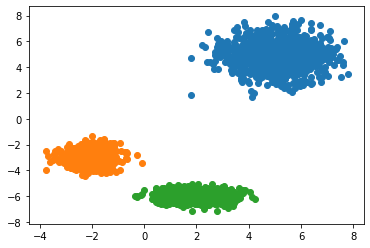

In [5]:
D1 = np.random.normal((5,5),(1,1),(1000,2))
D2 = np.random.normal((-2,-3),(.5,.5),(1000,2))
D3 = np.random.normal((2,-6),(.7,.3),(1000,2))


plt.figure()
plt.scatter(D1[:,0],D1[:,1])
plt.scatter(D2[:,0],D2[:,1])
plt.scatter(D3[:,0],D3[:,1])
plt.show()

In [6]:
Points = []
X = np.linspace(-5,5,100)
Y = np.linspace(-8,8,100)    
for x in X:
    for y in Y:
        Points.append(np.array([x,y]))

Data = np.vstack([D1,D2,D3])

L1 = np.array([[1,0,0] for i in range(len(D1))])
L2 = np.array([[0,1,0] for i in range(len(D2))])
L3 = np.array([[0,0,1] for i in range(len(D3))])

Label = np.vstack([L1,L2,L3])

All = np.hstack([Data,Label])

Network = SGDNN(5)
Network.trainingAlgorithm(All)

  1%|          | 72/10000 [00:00<00:28, 350.00it/s]

Error: 0.03834007007522097


 11%|█         | 1051/10000 [00:02<00:25, 355.16it/s]

Error: 0.0012530884111774982


 21%|██        | 2060/10000 [00:05<00:22, 352.42it/s]

Error: 0.0008265811168190841


 31%|███       | 3056/10000 [00:08<00:21, 327.11it/s]

Error: 0.0006127780469487164


 40%|████      | 4043/10000 [00:11<00:16, 360.73it/s]

Error: 0.00048435483268211477


 50%|█████     | 5044/10000 [00:14<00:13, 363.93it/s]

Error: 0.0004202391530059682


 61%|██████    | 6053/10000 [00:16<00:10, 366.15it/s]

Error: 0.0003730797520089702


 71%|███████   | 7056/10000 [00:19<00:08, 366.08it/s]

Error: 0.00032703275684798445


 81%|████████  | 8064/10000 [00:22<00:05, 365.95it/s]

Error: 0.00030964855646614783


 91%|█████████ | 9074/10000 [00:25<00:02, 366.97it/s]

Error: 0.00027604503522396246


100%|██████████| 10000/10000 [00:27<00:00, 360.66it/s]


In [7]:
print("Testing")
print("[-2,-3]")
res = Network.testPoint(np.array([-2,-3]))
print(f"Result: {np.round(res, 2)}")

print("[5,5]")
res = Network.testPoint(np.array([5,5]))
print(f"Result: {np.round(res,2)}")
Vals = []    
for p in Points:
    Vals.append(Network.testPoint(p))

f = open("trainedValues.csv",'w')
for i in range(len(Points)):
    Line = str(Points[i][0])+","+str(Points[i][1])+","+str(np.argmax(Vals[i])) +"\n"
    f.write(Line)
f.close()

Testing
[-2,-3]
Result: [0. 1. 0.]
[5,5]
Result: [1. 0. 0.]


# Neural Networks



# Simple Model

To start let's recreate our NumPy based model from above.  Using `sigmoid` activation and `mean squared error` to start with.  The layers will be:

- Input
- Hidden Layer
- Output



In [8]:
import tensorflow as tf

In [9]:
input_layer = tf.keras.layers.Input(
    shape=[2]
)

hidden_layer = tf.keras.layers.Dense(
    5, 
    activation='sigmoid'
)(input_layer)

output_layer = tf.keras.layers.Dense(
    3, 
    activation='sigmoid'
)(hidden_layer)

model = tf.keras.Model(
    inputs=input_layer,
    outputs=output_layer,
    name='initial_model'
)

model.summary()

Model: "initial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


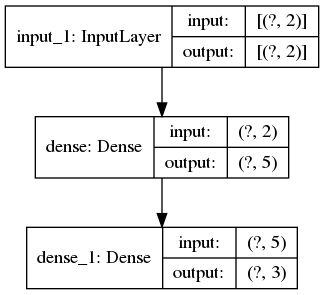

In [10]:
tf.keras.utils.plot_model(
    model, 
    'my_first_model.png',
    show_shapes=True
)

In [11]:
model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# Loss Functions
>Images and Code Taken from https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

---
![](imgs/losses.png)
> FROM: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0
---

### Mean Square Error

From Wikipedia:
>In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.

- https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

![](imgs/mse.png)

```
import numpy as npy_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_valprint("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))rmse_val = rmse(y_hat, y_true)
print("rms error is: " + str(rmse_val))
```


### Mean Absolute Error

From Wikipedia:https://en.wikipedia.org/wiki/Mean_absolute_error

>In statistics, mean absolute error (MAE) is a measure of difference between two continuous variables. Assume X and Y are variables of paired observations that express the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. Consider a scatter plot of n points, where point i has coordinates (xi, yi)... Mean Absolute Error (MAE) is the average vertical distance between each point and the identity line. MAE is also the average horizontal distance between each point and the identity line. 

![](imgs/mae.png)

```
import numpy as npy_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])

print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))

def mae(predictions, targets):
    differences = predictions - targets
    absolute_differences = np.absolute(differences)
    mean_absolute_differences = absolute_differences.mean()
    return mean_absolute_differencesmae_val = mae(y_hat, y_true)
print ("mae error is: " + str(mae_val))
```


### Cross Entropy Loss

>In information theory, the cross entropy between two probability distributions p {\displaystyle p} p and q {\displaystyle q} q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q {\displaystyle q} q, rather than the true distribution p {\displaystyle p} p. 

Resources:
- https://gombru.github.io/2018/05/23/cross_entropy_loss/


![](imgs/cel.png)

```
import numpy as nppredictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                   [0,0,0,1]])def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    return ce_losscross_entropy_loss = cross_entropy(predictions, targets)
print ("Cross entropy loss is: " + str(cross_entropy_loss))
```

Resources:
- https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

In [12]:
for d in dir(tf.keras.losses):
    if d[0] == "_":
        continue
    print(d)

BinaryCrossentropy
CategoricalCrossentropy
CategoricalHinge
CosineSimilarity
Hinge
Huber
KLD
KLDivergence
LogCosh
Loss
MAE
MAPE
MSE
MSLE
MeanAbsoluteError
MeanAbsolutePercentageError
MeanSquaredError
MeanSquaredLogarithmicError
Poisson
Reduction
SparseCategoricalCrossentropy
SquaredHinge
binary_crossentropy
categorical_crossentropy
categorical_hinge
cosine_similarity
deserialize
get
hinge
kld
kullback_leibler_divergence
logcosh
mae
mape
mean_absolute_error
mean_absolute_percentage_error
mean_squared_error
mean_squared_logarithmic_error
mse
msle
poisson
serialize
sparse_categorical_crossentropy
squared_hinge


In [13]:
for d in dir(tf.keras.activations):
    if d[0]=="_":
        continue
    print(d)

deserialize
elu
exponential
get
hard_sigmoid
linear
relu
selu
serialize
sigmoid
softmax
softplus
softsign
tanh


In [14]:
for d in dir(tf.keras.metrics):
    if d[0] == "_":
        continue
    print(d)

AUC
Accuracy
BinaryAccuracy
BinaryCrossentropy
CategoricalAccuracy
CategoricalCrossentropy
CategoricalHinge
CosineSimilarity
FalseNegatives
FalsePositives
Hinge
KLD
KLDivergence
LogCoshError
MAE
MAPE
MSE
MSLE
Mean
MeanAbsoluteError
MeanAbsolutePercentageError
MeanIoU
MeanRelativeError
MeanSquaredError
MeanSquaredLogarithmicError
MeanTensor
Metric
Poisson
Precision
Recall
RootMeanSquaredError
SensitivityAtSpecificity
SparseCategoricalAccuracy
SparseCategoricalCrossentropy
SparseTopKCategoricalAccuracy
SpecificityAtSensitivity
SquaredHinge
Sum
TopKCategoricalAccuracy
TrueNegatives
TruePositives
binary_accuracy
binary_crossentropy
categorical_accuracy
categorical_crossentropy
deserialize
get
hinge
kld
kullback_leibler_divergence
mae
mape
mean_absolute_error
mean_absolute_percentage_error
mean_squared_error
mean_squared_logarithmic_error
mse
msle
poisson
serialize
sparse_categorical_accuracy
sparse_categorical_crossentropy
sparse_top_k_categorical_accuracy
squared_hinge
top_k_categorical_a

In [15]:
import tensorflow as tf

input_layer = tf.keras.layers.Input(
    shape=[2]
)

hidden_layer = tf.keras.layers.Dense(32, activation='relu')(input_layer)

output_layer = tf.keras.layers.Dense(3, activation='relu')(hidden_layer)

model = tf.keras.Model(
    inputs=input_layer,
    outputs=output_layer,
    name='initial_model'
)

model.summary()

tf.keras.utils.plot_model(
    model, 
    'my_first_model.png',
    show_shapes=True
)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

Model: "initial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


# Recurrent Neural Networks

Resources:
- https://www.tensorflow.org/guide/keras/rnn

Taken from Wikipedia:

>A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition[1] or speech recognition.[2][3]

>The term "recurrent neural network" is used indiscriminately to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior.[4] A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that can not be unrolled.

>Both finite impulse and infinite impulse recurrent networks can have additional stored state, and the storage can be under direct control by the neural network. The storage can also be replaced by another network or graph, if that incorporates time delays or has feedback loops. Such controlled states are referred to as gated state or gated memory, and are part of long short-term memory networks (LSTMs) and gated recurrent units. 

Other Resources:

- https://medium.com/@jianqiangma/all-about-recurrent-neural-networks-9e5ae2936f6e

## Long-Short Term Memory (LSTM)

>Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition[2] or speech recognition.[3][4] Bloomberg Business Week wrote: "These powers make LSTM arguably the most commercial AI achievement, used for everything from predicting diseases to composing music."[5]

>A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

>LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the exploding and vanishing gradient problems that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.[citation needed] 

![](imgs/lstm.svg)

## Gated Recurrent Unit (GRU)

>Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al.[1] The GRU is like a long short-term memory (LSTM) with forget gate[2] but has fewer parameters than LSTM, as it lacks an output gate.[3] GRU's performance on certain tasks of polyphonic music modeling and speech signal modeling was found to be similar to that of LSTM. GRUs have been shown to exhibit even better performance on certain smaller datasets.[4]

>However, as shown by Gail Weiss & Yoav Goldberg & Eran Yahav, the LSTM is "strictly stronger" than the GRU as it can easily perform unbounded counting, while the GRU cannot.[5] That's why the GRU fails to learn simple languages that are learnable by the LSTM.[5]

>Similarly, as shown by Denny Britz & Anna Goldie & Minh-Thang Luong & Quoc Le of Google Brain, LSTM cells consistently outperform GRU cells in "the first large-scale analysis of architecture variations for Neural Machine Translation."[6] 

![](imgs/gru.svg)


### Building LSTM Models

In [16]:
model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(tf.keras.layers.Embedding(
    input_dim=1000, 
    output_dim=64
))

# Add a LSTM layer with 128 internal units.
model.add(tf.keras.layers.LSTM(128))

# Add a Dense layer with 10 units and softmax activation.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


### Outputs and states

From: https://www.tensorflow.org/guide/keras/rnn#outputs_and_states

By default, the output of a RNN layer contain a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. The shape of this output is (batch_size, units) where units corresponds to the units argument passed to the layer's constructor.

A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set return_sequences=True. The shape of this output is (batch_size, timesteps, units).

In [2]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(
    input_dim=1000, 
    output_dim=64
))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(tf.keras.layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(tf.keras.layers.GRU(128))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary() 

W1106 18:39:46.647600 4378637760 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:111: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1106 18:39:46.659183 4378637760 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         246528    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               147840    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 459,658
Trainable params: 459,658
Non-trainable params: 0
_________________________________________________________________


In addition, a RNN layer can return its final internal state(s). The returned states can be used to resume the RNN execution later, or to initialize another RNN. This setting is commonly used in the encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.

To configure a RNN layer to return its internal state, set the return_state parameter to True when creating the layer. Note that LSTM has 2 state tensors, but GRU only has one.

To configure the initial state of the layer, just call the layer with additional keyword argument initial_state. Note that the shape of the state needs to match the unit size of the layer, like in the example below.

In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = tf.keras.layers.Input(shape=(None, ))
encoder_embedded = tf.keras.layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)

# Return states in addition to output
output, state_h, state_c = tf.keras.layers.LSTM(
    64, return_state=True, name='encoder')(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = tf.keras.layers.Input(shape=(None, ))
decoder_embedded = tf.keras.layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = tf.keras.layers.LSTM(
    64, name='decoder')(decoder_embedded, initial_state=encoder_state)
output = tf.keras.layers.Dense(10, activation='softmax')(decoder_output)

model = tf.keras.Model([encoder_input, decoder_input], output)
model.summary()


### Cross-batch statefulness

From: https://www.tensorflow.org/guide/keras/rnn#cross-batch_statefulness

When processing very long sequences (possibly infinite), you may want to use the pattern of cross-batch statefulness.

Normally, the internal state of a RNN layer is reset every time it sees a new batch (i.e. every sample seen by the layer is assume to be independent from the past). The layer will only maintain a state while processing a given sample.

If you have very long sequences though, it is useful to break them into shorter sequences, and to feed these shorter sequences sequentially into a RNN layer without resetting the layer's state. That way, the layer can retain information about the entirety of the sequence, even though it's only seeing one sub-sequence at a time.

You can do this by setting stateful=True in the constructor.

If you have a sequence s = [t0, t1, ... t1546, t1547], you would split it into e.g.

In [ ]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = tf.keras.layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to the original initial_state.
# If no initial_state was provided, zero-states will be used by default.
lstm_layer.reset_states()


### Building GRU Models

## Bi-Directional Recurrent Neural Networks

>Bi-directional RNNs use a finite sequence to predict or label each element of the sequence based on the element's past and future contexts. This is done by concatenating the outputs of two RNNs, one processing the sequence from left to right, the other one from right to left. The combined outputs are the predictions of the teacher-given target signals. This technique proved to be especially useful when combined with LSTM RNNs.[47][48]

- https://www.sciencedirect.com/science/article/abs/pii/S0893608005001206?via%3Dihub


###  Bidirectional RNNs

From: https://www.tensorflow.org/guide/keras/rnn#bidirectional_rnns

For sequences other than time series (e.g. text), it is often the case that a RNN model can perform better if it not only processes sequence from start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only just the words that come before it.

Keras provides an easy API for you to build such bidirectional RNNs: the `tf.keras.layers.Bidirectional` wrapper.

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True), 
    input_shape=(5, 10))
)
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()
